In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv("./tvmarketing.csv")
df.head()

,TV,Sales
0,230.1,22.1
1,44.5,10.4
2,17.2,9.3
3,151.5,18.5
4,180.8,12.9


<Axes: xlabel='TV', ylabel='Sales'>

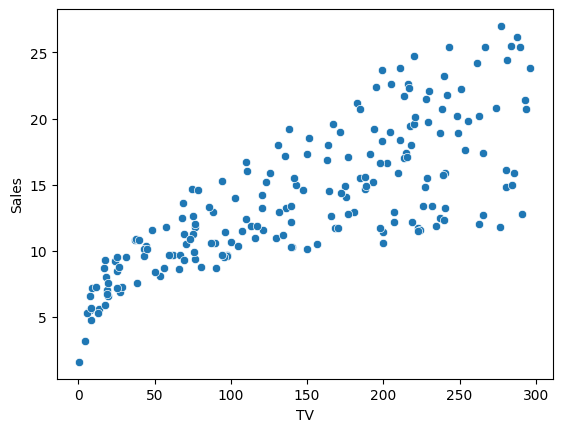

In [3]:
sns.scatterplot(data=df,x='TV',y='Sales')

<Axes: xlabel='TV', ylabel='Sales'>

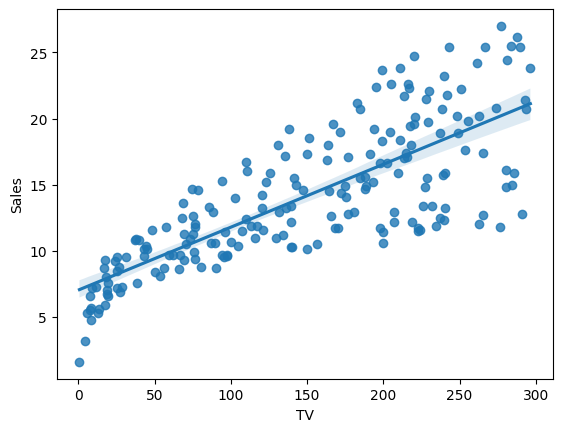

In [4]:
sns.regplot(data=df,x='TV',y='Sales')

for simple linear regression 
$$ y = mx + c $$

$$m = \frac{{n\sum xy - (\sum x)(\sum y)}}{{n\sum x^2 - (\sum x)^2}}$$

$$c = \frac{{\sum y - m(\sum x)}}{n}$$


In [5]:
class LR:
    def __init__(self):
        self.b = None
        self.m = None

    def fit(self,x_train,y_train):
        n = x_train.size
        sum_xy = np.sum(x_train*y_train)
        sum_x = np.sum(x_train)
        sum_y = np.sum(y_train)

        sum_x_2  = np.sum(np.square(x_train))

        self.m = ((n * sum_xy) - (sum_x*sum_y))/\
                 ((n* sum_x_2)-np.square(sum_x))
    
        self.c = (sum_y - self.m * sum_x) /n

        print(self.m,self.c)

    def predict(self,x):
        return self.m * x + self.c

        

In [6]:
from sklearn.model_selection import train_test_split


In [7]:
x = df["TV"].values
y = df["Sales"].values

In [8]:
x_train,x_test, y_train, y_test = train_test_split(x,y,test_size=0.18,random_state=10)

In [9]:
lr = LR()

In [10]:
lr.fit(x_train,y_train)

0.044986779655455104 7.218630641777775


In [11]:
x_train.shape

(164,)

In [12]:
y_pred=lr.predict(x_test)

In [20]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [14]:
r2_score(y_test,y_pred)

0.6614587532586851

In [21]:
mean_squared_error(y_test,y_pred)

14.659483809741468

In [22]:
mean_absolute_error(y_test,y_pred)

3.0289539462734414

# using linear regression from sklearn

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
lr1 = LinearRegression()

In [17]:
lr1.fit(x_train.reshape(-1,1),y_train)

LinearRegression()

In [18]:
lr1.score(x_test.reshape(-1,1),y_test)

0.6614587532586846